<a href="https://colab.research.google.com/github/pgshirts/hello-world/blob/master/HW3_problem1_PhilShirts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
#https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/
from matplotlib import pyplot
from sklearn.datasets import make_blobs 
from pandas import DataFrame
#https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
import matplotlib.pyplot as plt

Assume you receive real-estate data for 10 million samples as input and each sample has 25 different features/attributes.    

Design a 3 layers fully connected network to predict the value of a house for sale (test section).      

Assign 90 to 10 ratio for splitting train and test sets. Include at least one sort of regularization and apply 1000 iterations for your training step.  Besides these, as a designer, feel free to set the rest of your 
network hyperparameters as you wish.

In [ ]:
#Assume you receive real-estate data for 10 million samples as input and each sample has 25 different features/attributes. 
#Alex Dodd suggested using the make_blobs function in sklearn
X,y = make_blobs(n_samples=100000, centers=1, n_features=25)
print(X.shape)
print(X[0])


(100000, 25)
[  8.26080649   5.9767656    4.73166801   6.86385398 -10.44298404
   3.47550955   7.55905195   4.28137762   3.63165278  -3.39033417
   6.18613487   1.07158913  10.6732935    7.31071021   9.56929908
  -4.86987221  -1.01619692   7.58610333  -9.14901509   0.64664552
  -4.73406891   3.37049411  -2.92397724  -2.39140331  -1.20216411]


In [ ]:
print(y.shape)

(100000,)


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
#Assign 90 to 10 ratio for splitting train and test sets. Include at least one sort of regularization and apply 1000 iterations for your training step. Besides these, as a designer, feel free to set the rest of your network hyperparameters as you wish.
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.1)

In [ ]:
#Design a 3 layers fully connected network to predict the value of a house for sale (test section).  
model = Sequential([
    Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.01), input_shape=(25,)), #because 25 features
    Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          validation_data=(X_val_and_test, Y_val_and_test))#is this right for X and Y

Epoch 1/10
2813/2813 [==============================] - 5s 2ms/step - loss: nan - accuracy: 0.1996 - val_loss: nan - val_accuracy: 0.2040
Epoch 2/10
2813/2813 [==============================] - 4s 1ms/step - loss: nan - accuracy: 0.1996 - val_loss: nan - val_accuracy: 0.2040
Epoch 3/10
2813/2813 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.1996 - val_loss: nan - val_accuracy: 0.2040
Epoch 4/10
2813/2813 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.1996 - val_loss: nan - val_accuracy: 0.2040
Epoch 5/10
2813/2813 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.1996 - val_loss: nan - val_accuracy: 0.2040
Epoch 6/10
2813/2813 [==============================] - 4s 1ms/step - loss: nan - accuracy: 0.1996 - val_loss: nan - val_accuracy: 0.2040
Epoch 7/10
2813/2813 [==============================] - 4s 1ms/step - loss: nan - accuracy: 0.1996 - val_loss: nan - val_accuracy: 0.2040
Epoch 8/10
2813/2813 [============

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

NameError: ignored

In [ ]:
print(list(hist.history.keys()))

['loss', 'accuracy', 'val_loss', 'val_accuracy']


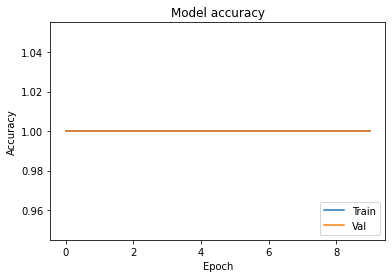

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()